
<a id='chap-tpmodelesmelange'></a>

# Travaux pratiques - Modèles de mélange

**Objectif:** utilisation des fonctionnalités de Scikit-learn concernant l’estimation de modèles de mélange, et contribution à une meilleure compréhension de cette méthode et des techniques de choix du nombre de composantes. 

Gilles Cohen | gilles.cohen@univ.lyon1.fr

M2 - UCBL Université Lyon.

## Modèles de mélange gaussiens

La présentation des outils disponibles pour les modèles de mélange se trouve dans [http://scikit-learn.org/stable/modules/mixture.html](http://scikit-learn.org/stable/modules/mixture.html).

La sélection d’un modèle (le choix du nombre de composantes du mélange, mais aussi du type de matrice de covariances entre `'full'`, `'tied'`, `'diag'`, `'spherical'`, voir plus bas) peut être faite grâce au calcul de *Akaike information criterion* (AIC) ou de *Bayes information criterion* (BIC).

Parmi les paramètres, arrêtons-nous aux suivants (regarder la [description de l’implémentation](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) pour les autres) :

- `n_components` : le nombre de composantes du mélange (`1` par défaut).  
- `covariance_type` : type de la matrice de covariance employée, choix entre `'full'`, `'tied'`, `'diag'` et `'spherical'`, par défaut `'full'` ; `'full'` = matrice quelconque, `'tied'` = matrice quelconque mais identique entre les différentes composantes du mélange, `'diag'` = matrice diagonale (variances quelconques mais covariances nulles), `'spherical'` = chaque composante a sa propre variance (mais cette valeur est partagée par toutes les variables pour cette composante) et covariances nulles.  
- `init_params` : méthode d’initialisation des paramètres, choix entre `'kmeans'` (classification automatique des observations avec *K-means*, ensuite utilisation de chaque centre de groupe comme moyenne d’une composante du mélange et de la matrice de covariances empiriques du groupe comme matrice de variances-covariances pour cette composante) et `'random'` ; par défaut `'kmeans'`.  
- `n_init` : nombre d’initialisations (suivies d’exécutions de EM) effectuées ; les meilleurs résultats sont conservés.  


Parmi les attributs accessibles nous pouvons mentionner (regardez la documentation pour voir la totalité des attributs) :

- `weights_` : les coefficients de mélange (pondérations des différentes composantes du mélange).  
- `means_` : les moyennes des composantes du mélange.  
- `covariances_` : les matrices de covariance des composantes du mélange.  
- `converged_` : `True` si EM a convergé (dans `.fit()`), `False` sinon.  
- `lower_bound_` : log-vraisemblance atteinte à la fin des itérations par la meilleure exécution de EM.  


Les méthodes qui peuvent être employées :

- `fit(X, y=None)` : calcul du modèle à partir des observations qui sont les lignes de X.  
- `aic(X)` : valeur du critère d’information de Akaike sur les données de X pour le modèle courant.  
- `bic(X)` : valeur du critère d’information de Bayes sur les données de X pour le modèle courant.  
- `predict_proba(X)` : probabilités *a posteriori* par rapport à chaque composante du modèle courant pour chaque donnée de X.  
- `predict(X, y=None)` : étiquettes de groupe (classification automatique issue du modèle de mélange grâce aux probabilités *a posteriori*) obtenues avec le modèle courant pour les données de X.  
- `sample([n_samples, random_state])` : générer un échantillon (composé de `n_samples` données) à partir du modèle (pour le moment, accessible seulement pour les noyaux `'gaussian'` et `'tophat'`).  
- `score(X, y=None)` : retourne la log-vraisemblance totale des données de X par rapport au modèle.  
- `score_samples(X)` : retourne le logarithme de la densité calculée pour chaque donnée de X.  
- `get_params([deep])` : lire les valeurs des paramètres de l’estimateur employé.  
- `set_params(**params)` : donner des valeurs aux paramètres de l’estimateur employé.  

### Estimation à partir de données générées

Une première utilisation sur des données unidimensionnelles similaires à celles employées pour l’estimation par noyaux (attention, la classe `GaussianMixture` est disponible à partir de la version 0.18 de Scikit-learn, pour des versions antérieures il faut se servir plutôt de la classe `GMM`) :

True
-2.032919469191889


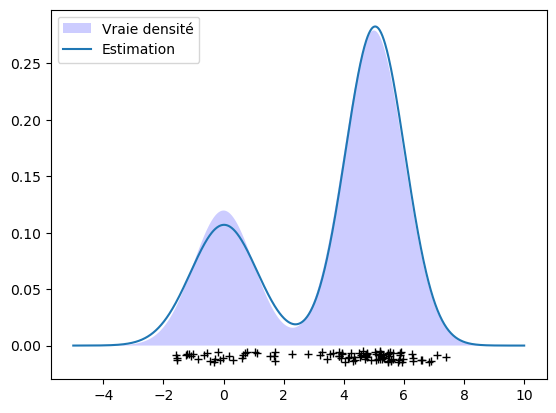

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["OMP_NUM_THREADS"] = '1'
from scipy.stats import norm
from sklearn.mixture import GaussianMixture



# générer l'échantillon
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

# préparer les données où on calculera la densité
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_density = (0.3*norm(0,1).pdf(X_plot[:,0]) + 0.7*norm(5,1).pdf(X_plot[:,0]))

# estimation par mélange gaussien, avec le « bon » nombre de composantes
gmm = GaussianMixture(n_components=2,n_init=3).fit(X)
print(gmm.converged_)
print(gmm.lower_bound_)

# calcul de la densité pour les données de X_plot
density = np.exp(gmm.score_samples(X_plot))

# affichage : vraie densité et estimation
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax.legend(loc='upper left')
plt.show()

### Question :

Faites varier le nombre de composantes et examinez visuellement les résultats. Regardez les pondérations des composantes et les moyennes de ces composantes. Examinez de quelle manière évolue la valeur finale atteinte par la log-vraisemblance avec le nombre de composantes.

Une utilisation sur des données bidimensionnelles :

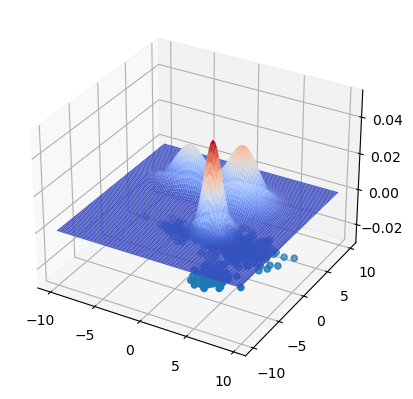

In [4]:
# générer l'échantillon
md1 = 1.5 * np.random.randn(200,2) + [3,3]
md2 = np.random.randn(100,2).dot([[2, 0],[0, 0.8]]) + [-3, 3]
md3 = np.random.randn(100,2) + [3, -3]
md = np.concatenate((md1, md2, md3))

# préparer les données où on calculera la densité
grid_size = 100
Gx = np.arange(-10, 10, 20/grid_size)
Gy = np.arange(-10, 10, 20/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)

# estimation par mélange gaussien
gmm = GaussianMixture(n_components=3,n_init=3).fit(md)

# calcul de la densité pour les données de la grille
density = np.exp(gmm.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis],
        (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

# affichage : données et estimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(Gx, Gy, density.reshape(grid_size,grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.scatter(md[:,0], md[:,1], -0.025)
plt.show()

### Question :

Faites varier le nombre de composantes et examinez visuellement les résultats. Examinez de quelle manière évolue la valeur finale atteinte par la log-vraisemblance avec le nombre de composantes.

### Question :

Générez des données bidimensionnelles suivant une distribution **uniforme** dans $ [0, 1]^2 $ (données bidimensionelles dans le carré unité). Estimez un mélange gaussien avec 3 composantes, en utilisant `n_init = 1`. Visualisez les résultats. Utilisez la méthode `predict` de `GaussianMixture` pour obtenir des étiquettes de groupe pour les données. Appliquez plusieurs fois de suite la modélisation suivie d’affectation d’étiquettes de groupe et examinez la **stabilité des partitionnements** en utilisant [l’indice de Rand ajusté](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index), comme dans les TP de classification automatique. Attention, vous ne disposez pas de groupes définis au départ ; pour définir les groupes de référence, auxquels vous comparerez ceux issus des autres classifications, vous pouvez appliquer une première fois l’estimation de densité () suivie d’affectation d’étiquettes de groupe avec `predict`. Que constatez-vous ?

### Choix du nombre de composantes et du type de matrice de covariances pour les données générées

Pour choisir le nombre de composantes du mélange, nous comparerons d’abord les critères AIC et BIC en utilisant des matrices de covariance `'full'` (par défaut). Sur les données bidimensionnelles générées :

AIC : [3922.871848576927, 3595.3399128833234, 3463.3532136141785, 3467.682396271156, 3482.4103186488665, 3489.7881361247896, 3495.6500627976384, 3513.2875768360173]
BIC : [3942.8291713124668, 3639.2460229015114, 3531.208110915014, 3559.4860808546396, 3598.162790514998, 3629.489395273569, 3659.3001092290656, 3700.8864105500925]


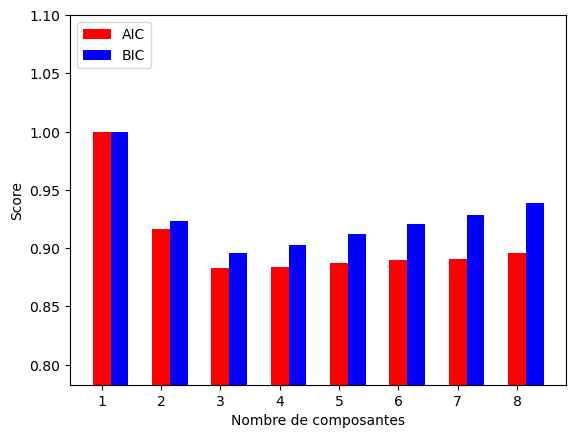

In [5]:
n_max = 8    # nombre de valeurs pour n_components
n_components_range = np.arange(n_max)+1
aic = []
bic = []

# construction des modèles et calcul des critères
for n_comp in n_components_range:
    gmm = GaussianMixture(n_components=n_comp).fit(md)
    aic.append(gmm.aic(md))
    bic.append(gmm.bic(md))

print("AIC : " + str(aic))
print("BIC : " + str(bic))

# normalisation des résultats obtenus pour les critères
raic = aic/np.max(aic)
rbic = bic/np.max(bic)

# affichage sous forme de barres
xpos = np.arange(n_max)+1  # localisation des barres
largeur = 0.3              # largeur des barres
fig = plt.figure()
plt.ylim([min(np.concatenate((rbic,raic)))-0.1, 1.1])
plt.xlabel('Nombre de composantes')
plt.ylabel('Score')
plt.bar(xpos, raic, largeur, color='r', label="AIC")
plt.bar(xpos+largeur, rbic, largeur, color='b', label="BIC")
plt.legend(loc='upper left')
plt.show()

Pour ces données et avec des matrices de covariances `'full'`, à la fois AIC et BIC permettent de privilégier l’utilisation de 3 composants, nombre égal à celui de lois normales qui ont permis de générer les données.

### Question :

Réalisez la même comparaison pour ces données avec des matrices de covariances `'diag'`.

### Question :

Ajoutez sur le même graphique (adapté) les valeurs normalisées de la log-vraisemblance finale pour chaque valeur de `n_components`.